In [71]:
# imports:
import numpy as np
import math, os, pickle
from numpy import genfromtxt
import matplotlib
import matplotlib.pyplot as plt

import statistics


In [142]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def softmax(A):  
    expA = np.exp(A)
    return expA / expA.sum()
    
def mapTargetsToEncoded(targets, tMap):
    newTargets = []
    for item in targets.tolist():
        newTargets.append(tMap[int(item[0])])
    return newTargets

# functions to use:
def sigmoid(matrix):
    #print("SIGMOID: \n" +str(matrix)+"\n")
    return 1/(1+np.exp(-matrix))

def getInputs(inputs):
    #add bias to layerOne and inputs
    row = inputs.shape[0] if np.ndim(inputs) != 1 else 1
    inputBias = np.ones((row,1)) if np.ndim(inputs) != 1 else np.ones((1))
    inputsWithBias = np.append(inputBias, inputs, 1) if np.ndim(inputs) != 1 else np.append(inputBias, inputs) 
    return inputsWithBias

def networkError(target, netResult):
    print("Target: " + str(target) + " Net Result: " + str(netResult))
    return .5*np.square(target - netResult)

def learning(weights, lr, error, activationsForLayer):
    print("Weights:  " + str(weights.shape))
    print("Learning Rate:  " + str(lr))
    print("Error:  " + str(error.shape))
    print("Activations: "+str(activationsForLayer.shape))
    return weights+lr*error*activationsForLayer

def load_objects(file):
    with open(file, 'rb') as input:
        return pickle.load(input)

def hiddenUnitError(temp, activations, error):
    return temp*(1-temp)*(activations*error)

def outputError(target, output):
    # Eouput = output(1-output)(target - output)
    return output*(1-output)*(target - output)

def save_it_all(obj, filename):
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        
def saveNet(theta1, theta2, fileName):
    weights = {"theta1":theta1, "theta2":theta2}
    save_it_all(weights, fileName)
    
def sigmoidDerivative(target, output):
    #E = (t − y) * y *  (1− y) // note: derivative of sigmoid func
    return (target - output) * output * (1 - output)

def netPlot(instance, error):
    instance = list(range(0, instance))
    
    
    with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        fig, ax = plt.subplots()
        ax.plot(instance, error)

        ax.set(xlabel='instance numebr (s)', ylabel='error (net)',
               title='Average Net Error for each batch run')
        ax.grid()

    plt.show()
    
def load_objects(file):
    with open(file, 'rb') as input:
        return pickle.load(input)
    
def classifyFish(inputInstance, theta1, theta2):
    # just need to feed forward 
    layerOneActivations = theta1.dot(np.transpose(inputInstance))
    print("\t\tLayer One activations: \n"+str(layerOneActivations)+"\n")
    layerOneSig = sigmoid(layerOneActivations)
    print("\t\tSigmoid Result: "+ str(layerOneSig) + "\n")
    inputsforhiddenlayer = getInputs(np.transpose(layerOneSig)) 
    print("\t\tInputs for the hiden layer is: (b,h1,h2)\n"+str(inputsforhiddenlayer)+"\n")

    outputActivation = theta2.dot(np.transpose(inputsforhiddenlayer)) 
    print("\t\tActivation for output layer: (h1,h2)\n" + str(outputActivation)+"\n")
        # inplace of sigmoid use softmax?? http://dataaspirant.com/2017/03/07/difference-between-softmax-function-and-sigmoid-function/
    outputFinal = sigmoid(outputActivation)
    print("\t\tFinal output: \n"+ str(outputFinal)+"\n")
    
    return "Yes" if outputFinal >= .5 else "No"

def getArrayFromFile(name):
    array = genfromtxt(name, delimiter=',')
    return array

In [145]:
# neural Net function:
def nn(learningRate, theta1, theta2, inputInstance, targetInstance):
    
    # feed forward:
    # phase One
    layerOneActivations = theta1.dot(np.transpose(inputInstance))
    print("\t\tLayer One activations: \n"+str(layerOneActivations)+"\n")
    layerOneSig = sigmoid(layerOneActivations)
    print("\t\tSigmoid Result: "+ str(layerOneSig) + "\n")
    inputsforhiddenlayer = getInputs(np.transpose(layerOneSig)) 
    print("\t\tInputs for the hiden layer is: (b,h1,h2)\n"+str(inputsforhiddenlayer)+"\n")

    outputActivation = theta2.dot(np.transpose(inputsforhiddenlayer)) 
    print("\t\tActivation for output layer: (h1,h2)\n" + str(outputActivation)+"\n")

    # phase two
    outputFinal = softmax(outputActivation)
    print("\t\tFinal output: \n"+ str(outputFinal)+"\n")

    # network error:
    netError = networkError(targetInstance, outputFinal)
    print("\t\tNetwork Error: \n" + str(netError)+"\n")

    # BACKPROPAGATE
    outputErr = outputError(targetInstance, outputFinal[0])
    print("\t\tOutput Error: \n"+str(outputErr)+"\n")

    hidUnitErr = hiddenUnitError(layerOneSig, layerOneActivations, outputErr)
    print("\t\tHidden unit errors: \n"+str(hidUnitErr)+"\n")

    # learning:
    theta1 = learning(theta1, learningRate, hidUnitErr, inputInstance)
    print("\t\tNext round of weights for layerOne: (b,x1,x2) \n"+ str(theta1)+"\n")

    theta2 = learning(theta2, learningRate, outputErr, inputsforhiddenlayer)
    print("\t\tNext round of weights for layer 2: (b,h1,h2) \n"+ str(theta2)+"\n")
    
    return theta1, theta2, netError


# trian the net


In [157]:
#Main:

# load in fishing normalized set 
# data = getArrayFromFile("normalizeFish.csv")
data = getArrayFromFile("normDigit.csv")
inputs = data[:,0:data.shape[1]-1] # get the input values
targets = data[:, data.shape[1]-1:data.shape[1]] # get the class values

print(targets.shape)

inputs = np.array([[0.5403,-0.4161],[-0.9900,-0.6536],[0.2837,0.9602]])
targets = np.array([[4],[2],[3]])

inputsWB = getInputs(inputs) # adds bias to the input matrix

numInputNodes = 3 #inputsWB.shape[1]
numOutputNodes = 4 #1 if np.unique(targets).shape[0] == 2 else np.unique(targets).shape[0]
numHiddenNodes = 2#int((2/3)*(numInputNodes+numOutputNodes))

print("Input node num including bias: "+ str(numInputNodes))
print("Hidden node num including bias: "+ str(numHiddenNodes))
print("Output node num: " + str(numOutputNodes))

# map the targets to teh right encoding
# targetMap = load_objects("./digitTargetCleanDict.pkl")
# targets = np.asarray(mapTargetsToEncoded(targets, targetMap), dtype=np.float32)

targets = np.array([[0,0,0,1],[0,1,0,0],[0,0,1,0]])

# inititlize weights
# (-1/sqrt(n)) < w < (1/sqrt(n))
lowRange = (-1/math.sqrt(numInputNodes))
highRange = math.fabs(lowRange)
theta1 = np.random.uniform(low=lowRange, high=highRange, size=(numHiddenNodes, numInputNodes))
theta2 = np.random.uniform(low=lowRange, high=highRange, size=(numOutputNodes,numHiddenNodes+1)) # add one for the bias node at this layer

print("Theta1 dims: " + str(theta1.shape))
print("Theta2 dims: " + str(theta2.shape))


learningRate = .5
numberProcess = 0
batchError = []
for r in range(0, 5): # batch
    trackedNetError= []
    for index in range(0, inputsWB.shape[0]): # online
        print(color.CYAN+color.BOLD+"----------- Data for batch: "+str(r)+" Online Round: "+str(index)+" ------------"+color.END)
        print("Inputs: \n" + str(inputs[index])+"\n")
        print("Learning Rate: \n" + str(learningRate)+"\n")
        print("Theta One: \n" + str(theta1)+"\n")
        print("Theta two: \n" + str(theta2)+"\n")
        print("Target: \n"+ str(targets[index]) + "\n")
        print(color.YELLOW+color.BOLD+"----------Processing on batch:"+str(r)+" with online instance: "+str(index)+"-------------"+color.END)
        theta1, theta2, netError = nn(learningRate, theta1, theta2, np.array([inputsWB[index]]), targets[index])
        trackedNetError.append(netError[0][0])
    numberProcess = numberProcess + 1 
    batchError.append(statistics.mean(trackedNetError))
saveNet(theta1, theta2, "./FishWeights.pkl")


(3823, 1)
Input node num including bias: 3
Hidden node num including bias: 2
Output node num: 4
Theta1 dims: (2, 3)
Theta2 dims: (4, 3)
----------- Data for batch: 0 Online Round: 0 ------------
Inputs: 
[ 0.5403 -0.4161]

Learning Rate: 
0.5

Theta One: 
[[-0.47038461 -0.52338006  0.34967656]
 [ 0.42181853 -0.25063917  0.22668918]]

Theta two: 
[[-0.19682577  0.19285522  0.29026454]
 [-0.15089756 -0.24319228  0.52239331]
 [ 0.30095378  0.47819084 -0.33859019]
 [ 0.50059279 -0.1036799  -0.04524718]]

Target: 
[0 0 0 1]

----------Processing on batch:0 with online instance: 0-------------
		Layer One activations: 
[[-0.89866727]
 [ 0.19207282]]

		Sigmoid Result: [[0.28932445]
 [0.54787112]]

		Inputs for the hiden layer is: (b,h1,h2)
[[1.         0.28932445 0.54787112]]

		Activation for output layer: (h1,h2)
[[0.01799952]
 [0.06494518]
 [0.2538023 ]
 [0.44580603]]

		Final output: 
[[0.20627578]
 [0.21619044]
 [0.26112959]
 [0.3164042 ]]

Target: [0 0 0 1] Net Result: [[0.20627578]
 [

ValueError: operands could not be broadcast together with shapes (2,4) (1,3) 

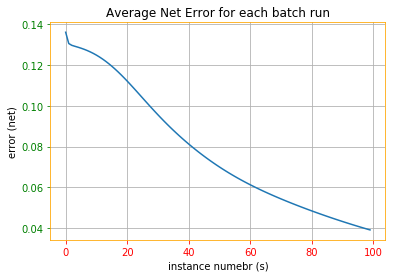

In [44]:
netPlot(numberProcess, batchError)

In [148]:
inputs = np.array([[0.5403,-0.4161],[-0.9900,-0.6536],[0.2837,0.9602]])
targets = np.array([[0,0,0,1],[0,1,0,0],[0,0,1,0]])

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,

In [150]:
inputs = np.array([[0.5403,-0.4161],[-0.9900,-0.6536],[0.2837,0.9602]])
targets = np.array([[0,0,0,1],[0,1,0,0],[0,0,1,0]])
inputs.shape

(3, 2)

In [151]:
targets.shape

(3, 4)

In [153]:
np.unique(targets).shape

(2,)